In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
#importing all the libraries

In [59]:
movies = pd.read_csv(r"C:\Users\nilas\OneDrive\Desktop\IDS_Project\movies.csv")
imdb_tmdb = pd.read_csv(r"C:\Users\nilas\OneDrive\Desktop\IDS_Project\IMDB TMDB Movie Metadata Big Dataset (1M).csv")
tmdb = pd.read_csv(r"C:\Users\nilas\OneDrive\Desktop\IDS_Project\TMDB_movie_dataset_v11.csv")

#reading the datset which are read from a csv file

In [60]:
print("Dataset Shapes:")
print(f"movies: {movies.shape}")
print(f"imdb_tmdb: {imdb_tmdb.shape}")
print(f"tmdb: {tmdb.shape}")

#returns tuple value consisting of rows and column

Dataset Shapes:
movies: (722317, 20)
imdb_tmdb: (1072255, 42)
tmdb: (1180495, 24)


In [68]:
print("Columns in each dataset:")

print("\nmovies columns:")
print(movies.columns.tolist())
print("\nimdb_tmdb columns:")
print(imdb_tmdb.columns.tolist())
print("\ntmdb columns:")
print(tmdb.columns.tolist())

#printing columns from the dataset

Columns in each dataset:

movies columns:
['id', 'title', 'genres', 'original_language', 'overview', 'popularity', 'production_companies', 'release_date', 'budget', 'revenue', 'runtime', 'status', 'tagline', 'vote_average', 'vote_count', 'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations']

imdb_tmdb columns:
['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'production_companies', 'production_countries', 'spoken_languages', 'keywords', 'release_year', 'Director', 'AverageRating', 'Poster_Link', 'Certificate', 'IMDB_Rating', 'Meta_score', 'Star1', 'Star2', 'Star3', 'Star4', 'Writer', 'Director_of_Photography', 'Producers', 'Music_Composer', 'genres_list', 'Cast_list', 'overview_sentiment', 'all_combined_keywords']

tmdb columns:
['id', 'title', 'vote_average', 'vote_count', 

In [72]:
print("\nData types in each dataset:")
print("\nmovies:")
print(movies.dtypes)
print("\nimdb_tmdb:")
print(imdb_tmdb.dtypes)
print("\ntmdb:")
print(tmdb.dtypes)

#printing data types to analyse the column names for merging the data


Data types in each dataset:

movies:
id                        int64
title                    object
genres                   object
original_language        object
overview                 object
popularity              float64
production_companies     object
release_date             object
budget                  float64
revenue                 float64
runtime                 float64
status                   object
tagline                  object
vote_average            float64
vote_count              float64
credits                  object
keywords                 object
poster_path              object
backdrop_path            object
recommendations          object
dtype: object

imdb_tmdb:
id                           int64
title                       object
vote_average               float64
vote_count                   int64
status                      object
release_date                object
revenue                      int64
runtime                      int64
adult           

In [74]:
columns_to_convert = ["budget", "revenue", "runtime", "vote_count"]
imdb_tmdb[columns_to_convert] = imdb_tmdb[columns_to_convert].astype("float64")

#converting the irregular columns 

In [8]:
print(movies.dtypes)
print(imdb_tmdb.dtypes)

id                        int64
title                    object
genres                   object
original_language        object
overview                 object
popularity              float64
production_companies     object
release_date             object
budget                  float64
revenue                 float64
runtime                 float64
status                   object
tagline                  object
vote_average            float64
vote_count              float64
credits                  object
keywords                 object
poster_path              object
backdrop_path            object
recommendations          object
dtype: object
id                           int64
title                       object
vote_average               float64
vote_count                 float64
status                      object
release_date                object
revenue                    float64
runtime                    float64
adult                         bool
backdrop_path               obj

In [9]:
#Merging dataset movies and imdb_tmdb
# Merge datasets on 'id' and 'title' columns using outer join
merged_df1 = pd.merge(movies, imdb_tmdb, on=['id', 'title'], how='outer', suffixes=('_movies', '_imdb_tmdb'))


In [10]:
# Now, merge the remaining common columns, ensuring no data loss
common_cols = ['original_language', 'overview', 'popularity', 'production_companies', 'release_date', 'status','vote_average','poster_path', 'backdrop_path','keywords','tagline','budget','revenue','runtime','vote_count']

for col in common_cols:
    if col in movies.columns and col in imdb_tmdb.columns:
        # Fill missing values from one dataset with values from the other
        merged_df1[col] = merged_df1[col + '_movies'].combine_first(merged_df1[col + '_imdb_tmdb'])
        # Drop the unnecessary duplicate columns
        merged_df1.drop(columns=[col + '_movies', col + '_imdb_tmdb'], inplace=True)
#processing the data by filling missing values and deleting duplicate data columns

In [11]:
merged_df1.shape

(1150841, 45)

In [12]:
print(merged_df1.dtypes)

id                           int64
title                       object
genres                      object
credits                     object
recommendations             object
adult                       object
homepage                    object
imdb_id                     object
original_title              object
production_countries        object
spoken_languages            object
release_year               float64
Director                    object
AverageRating              float64
Poster_Link                 object
Certificate                 object
IMDB_Rating                float64
Meta_score                 float64
Star1                       object
Star2                       object
Star3                       object
Star4                       object
Writer                      object
Director_of_Photography     object
Producers                   object
Music_Composer              object
genres_list                 object
Cast_list                   object
overview_sentiment  

In [13]:
print(tmdb.dtypes)

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object


In [14]:
columns_to_convert = ["budget", "revenue", "runtime", "vote_count"]
tmdb[columns_to_convert] = tmdb[columns_to_convert].astype("float64")
#checking the common data columns from merged dataset and 3rd data set

In [15]:
print(tmdb.dtypes)

id                        int64
title                    object
vote_average            float64
vote_count              float64
status                   object
release_date             object
revenue                 float64
runtime                 float64
adult                      bool
backdrop_path            object
budget                  float64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object


In [16]:
merged_df = pd.merge(merged_df1,tmdb, on=['id', 'title'], how='outer', suffixes=('_merged_df1', '_tmdb'))
#merging the 3 datasets

In [17]:
common_cols = ['original_language','overview', 'popularity', 'production_companies', 'release_date',
               'status', 'vote_average', 'poster_path', 'backdrop_path', 'keywords',
               'tagline', 'budget', 'revenue', 'runtime', 'vote_count','original_title', 'production_countries','spoken_languages',
               'genres','adult','homepage','imdb_id']

for col in common_cols:
    if col in merged_df1.columns and col in tmdb.columns:
        # Fill missing values from one dataset with values from the other
        merged_df[col] = merged_df[col + '_merged_df1'].combine_first(merged_df[col + '_tmdb'])
        # Drop the unnecessary duplicate columns
        merged_df.drop(columns=[col + '_merged_df1', col + '_tmdb'], inplace=True)

#cleaned data

In [18]:
merged_df.shape
#rows and columns of merged data

(1261219, 45)

In [19]:
print(merged_df.dtypes)

id                           int64
title                       object
credits                     object
recommendations             object
release_year               float64
Director                    object
AverageRating              float64
Poster_Link                 object
Certificate                 object
IMDB_Rating                float64
Meta_score                 float64
Star1                       object
Star2                       object
Star3                       object
Star4                       object
Writer                      object
Director_of_Photography     object
Producers                   object
Music_Composer              object
genres_list                 object
Cast_list                   object
overview_sentiment         float64
all_combined_keywords       object
original_language           object
overview                    object
popularity                 float64
production_companies        object
release_date                object
status              

In [20]:
merged_df.to_csv("merged_movies_dataset_full.csv", index=False)

In [21]:
# Document dataset
print("Dataset Source: Merged from 'movies' and 'imdb_tmdb' datasets")
print(f"Dataset Dimensions: {merged_df.shape}")
print("Variable Descriptions:")
print(merged_df.info())

Dataset Source: Merged from 'movies' and 'imdb_tmdb' datasets
Dataset Dimensions: (1261219, 45)
Variable Descriptions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261219 entries, 0 to 1261218
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1261219 non-null  int64  
 1   title                    1261206 non-null  object 
 2   credits                  497603 non-null   object 
 3   recommendations          36016 non-null    object 
 4   release_year             979771 non-null   float64
 5   Director                 1132871 non-null  object 
 6   AverageRating            12272 non-null    float64
 7   Poster_Link              2915 non-null     object 
 8   Certificate              31289 non-null    object 
 9   IMDB_Rating              31801 non-null    float64
 10  Meta_score               2442 non-null     float64
 11  Star1                    31802 non-

In [22]:
# Data Preprocessing
# Handle missing data
# Fill numeric columns with mean
numeric_cols = merged_df.select_dtypes(include=['number']).columns
merged_df[numeric_cols] = merged_df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

In [23]:
# Fill categorical columns with mode
categorical_cols = merged_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = merged_df[col].mode()
    if not mode_value.empty:
        merged_df[col] = merged_df[col].fillna(mode_value.iloc[0])

# Drop any remaining rows with missing values
merged_df.dropna(inplace=True)



C:\Users\nilas\AppData\Local\Temp\ipykernel_20512\935887509.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].fillna(mode_value.iloc[0])


In [24]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Addressing outliers using Z-score thresholding
z_scores = np.abs(stats.zscore(merged_df.select_dtypes(include=['number'])))
merged_df = merged_df[(z_scores < 3).all(axis=1)]

# Normalize numeric features using Min-Max scaling
scaler = MinMaxScaler()
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

                 id  release_year  AverageRating   IMDB_Rating  Meta_score  \
count  1.174789e+06  1.174789e+06   1.174789e+06  1.174789e+06   1174789.0   
mean   5.322821e-01  5.481259e-01   5.118135e-01  4.521247e-01         0.0   
std    2.798368e-01  1.467867e-01   1.437743e-02  2.860054e-02         0.0   
min    0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00         0.0   
25%    3.027533e-01  5.316173e-01   5.119377e-01  4.518647e-01         0.0   
50%    5.282392e-01  5.572519e-01   5.119377e-01  4.518647e-01         0.0   
75%    7.820004e-01  6.641221e-01   5.119377e-01  4.518647e-01         0.0   
max    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00         0.0   

       overview_sentiment    popularity  vote_average        budget  \
count        1.174789e+06  1.174789e+06  1.174789e+06  1.174789e+06   
mean         5.009158e-01  1.858301e-02  1.770304e-01  1.934141e-03   
std          1.395039e-01  3.531075e-02  2.980624e-01  2.907132e-02   
min          

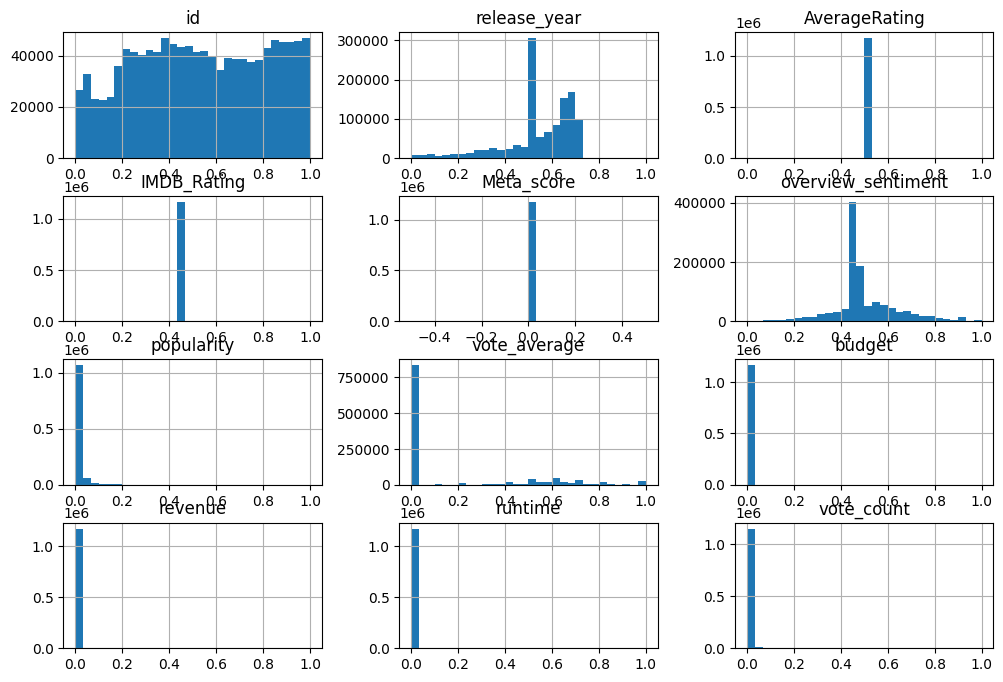

In [25]:
# Exploratory Data Analysis (EDA)
# Descriptive statistics
print(merged_df.describe())

# Visualizations
# Histograms
merged_df.hist(figsize=(12, 8), bins=30)
plt.show()



In [26]:
# Compute specific statistics manually
numeric_df = merged_df.select_dtypes(include=['number'])  # Select numeric columns

descriptive_stats = pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Standard Deviation': numeric_df.std(),
    'Minimum': numeric_df.min(),
    'Maximum': numeric_df.max()
})

print("\nDetailed Statistics:\n")
print(descriptive_stats)



Detailed Statistics:

                        Mean        Median  Standard Deviation  Minimum  \
id                  0.532282  5.282392e-01            0.279837      0.0   
release_year        0.548126  5.572519e-01            0.146787      0.0   
AverageRating       0.511814  5.119377e-01            0.014377      0.0   
IMDB_Rating         0.452125  4.518647e-01            0.028601      0.0   
Meta_score          0.000000  0.000000e+00            0.000000      0.0   
overview_sentiment  0.500916  4.616729e-01            0.139504      0.0   
popularity          0.018583  1.055131e-02            0.035311      0.0   
vote_average        0.177030  0.000000e+00            0.298062      0.0   
budget              0.001934  0.000000e+00            0.029071      0.0   
revenue             0.000818  2.197802e-07            0.017665      0.0   
runtime             0.001471  9.718551e-04            0.001714      0.0   
vote_count          0.004229  0.000000e+00            0.029597      0.0   

 

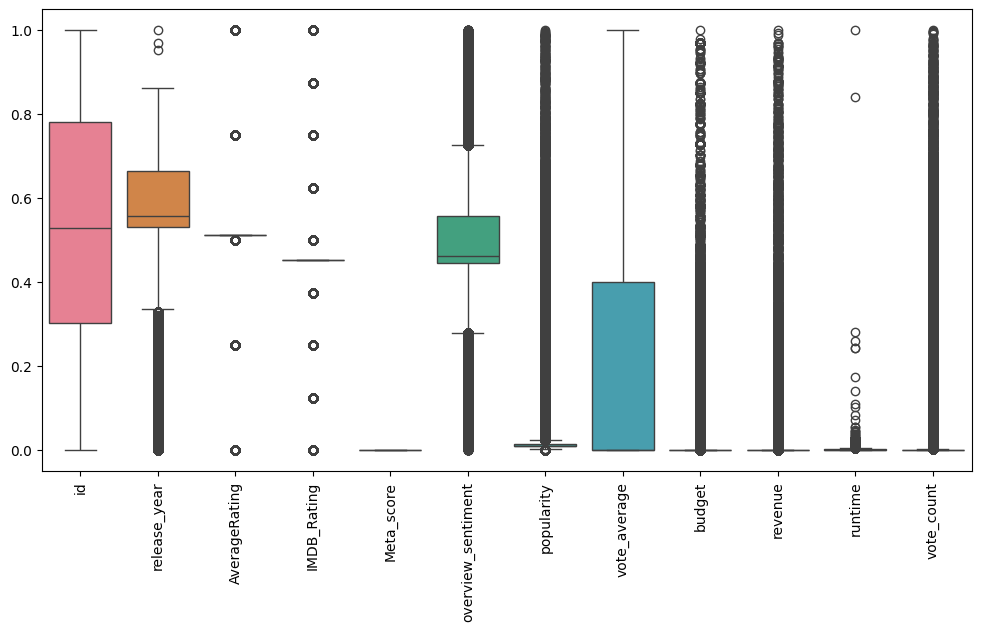

In [27]:
# Box plots to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()



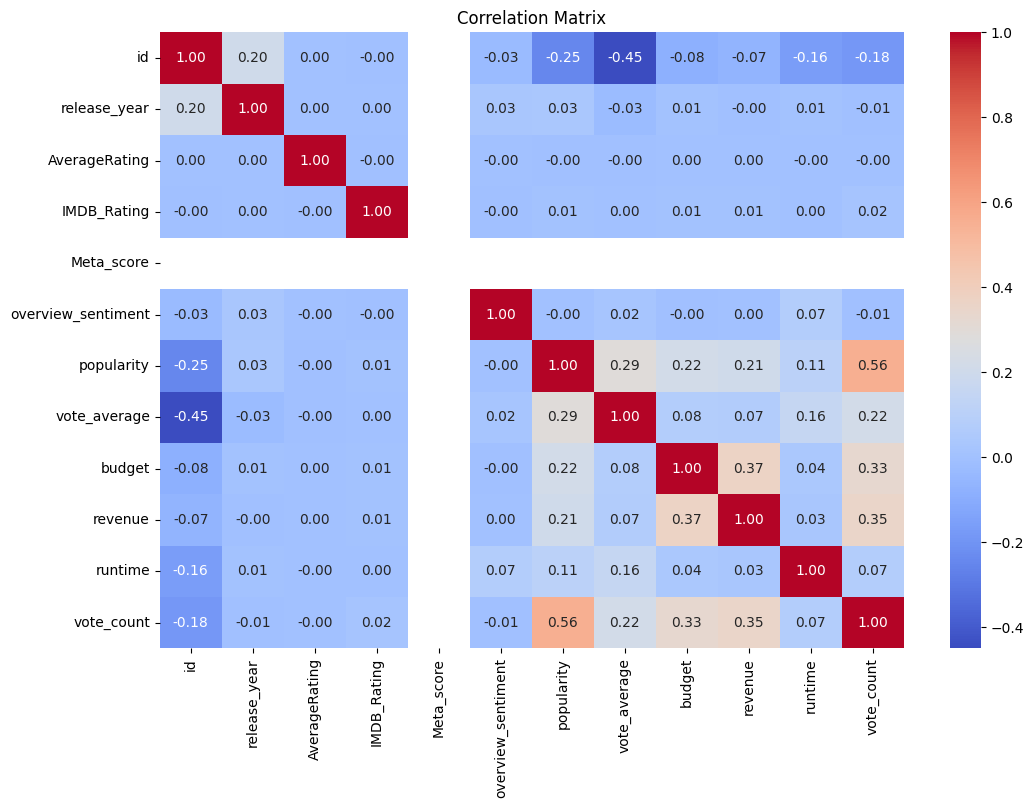

In [28]:
# Correlation matrix (only for numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = merged_df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
